# Fashion MNIST 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

In [3]:
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
# 6만개의 사진 > 각 사진의 사이즈는 28 * 28
train_input.shape, train_target.shape

((60000, 28, 28), (60000,))

In [5]:
test_input.shape, test_input.shape

((10000, 28, 28), (10000, 28, 28))

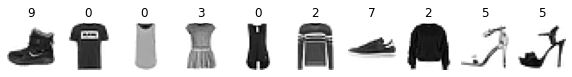

In [18]:
fig, ax = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    ax[i].imshow(train_input[i], cmap='gray_r')
    ax[i].set_title(train_target[i])
    ax[i].axis('off')   

In [19]:
np.unique(train_target, return_counts= True)
# 훈련샘플 6만개로, 전체 데이터를 한번에 사용 해 모델을 훈련하는 것보다, 
# 샘플을 하나씩 꺼내어 훈련하는 방법이 효율적
# 확률적 경사하강법 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [20]:
train_scaled = train_input / 255 # 픽셀은 0 ~ 255 사이의 값을 가지기 때문에 0~1 값으로 맞추어주기 위해 나누어줌

train_scaled = train_scaled.reshape(-1, 28 * 28) # 사진의 크기

In [21]:
train_scaled.shape

(60000, 784)

# SGDClassifier
여기서 sgd 를 사용한 이유는?

In [22]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

In [23]:
sgd = SGDClassifier(loss='log', max_iter=5, random_state=42)

In [24]:
scores = cross_validate(sgd, train_scaled, train_target, n_jobs = 1)

/home/eunbinpark/miniconda3/envs/da/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/eunbinpark/miniconda3/envs/da/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/eunbinpark/miniconda3/envs/da/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/eunbinpark/miniconda3/envs/da/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_

In [28]:
np.mean(scores['score_time']), np.mean(scores['test_score'])

(0.020968866348266602, 0.8196000000000001)

# 인공신경망
가장 기본적 인공 신경망은 확률적 경사 하강법을 사용하는 로지스틱 회귀와 같다.  
